# Problem Statement- To develop a model which will predict the insurance charges

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Reading the dataset
dataset=pd.read_csv('insurance_pre.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


# Converting Categorical Data to Numerical Data for Machine learning models to avoid redundancy

In [4]:
dataset=pd.get_dummies(dataset,drop_first=True).astype(int)

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27,0,16884,0,1
1,18,33,1,1725,1,0
2,28,33,3,4449,1,0
3,33,22,0,21984,1,0
4,32,28,0,3866,1,0
...,...,...,...,...,...,...
1333,50,30,3,10600,1,0
1334,18,31,0,2205,0,0
1335,18,36,0,1629,0,0
1336,21,25,0,2007,0,0


# To get the list of column names in a DataFrame

In [6]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [7]:
#This code selects independent variables (features) for a machine learning model
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]

In [8]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27,0,0,1
1,18,33,1,1,0
2,28,33,3,1,0
3,33,22,0,1,0
4,32,28,0,1,0
...,...,...,...,...,...
1333,50,30,3,1,0
1334,18,31,0,0,0
1335,18,36,0,0,0
1336,21,25,0,0,0


In [9]:
dependent=dataset[['charges']]

In [10]:
dependent

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.30,random_state=0)

# Decision Tree Code

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor=regressor.fit(X_train,y_train)

# Plot the decision tree

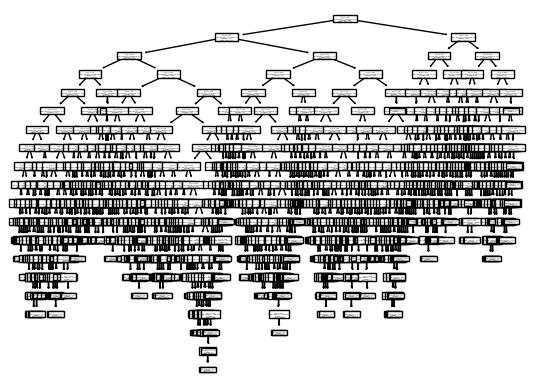

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [14]:
y_pred=regressor.predict(X_test)

In [15]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [16]:
r_score

0.7014091995203402

# Hypertuning

In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson', splitter='random')
regressor=regressor.fit(X_train,y_train)

In [46]:
y_pred=regressor.predict(X_test)

In [47]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [48]:
r_score

0.7411592987223987

# 

Criterion	Splitter	R_Score Value
Squared_error	best	0.7045
Friedman_mse	Best	0.6962
Absolute_error	Best	0.7249
Poisson	Best	0.6700
Squared_error	random	0.6954
Friedman_mse	Random	0.6679
Absolute_error	Random	0.7376
Poisson	random	0.7411

Result: By hypertuning with criterion:poisson and splitter:random we achieve r_score=0.74


# Support Vector Machine

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.30,random_state=0)

In [150]:
from sklearn.svm import SVR
regressor=SVR(kernel="linear",C=3000)
regressor.fit(X_train,y_train)

/Users/salmanhussain/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=3000, kernel='linear')

In [151]:
y_pred=regressor.predict(X_test)

In [152]:
from sklearn.metrics import r2_score 
r_score=r2_score(y_test,y_pred)

In [153]:
r_score

0.7590272859363828

In [154]:
#using kernel: linear and C:3000 we get a better r_score

# Random Forest

In [208]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(
    n_estimators=1000, 
    criterion='poisson', 
    max_features='log2')
regressor.fit(X_train, y_train)

/Users/salmanhussain/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(criterion='poisson', max_features='log2',
                      n_estimators=1000)

In [209]:
y_pred=regressor.predict(X_test)

In [210]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [211]:
r_score

0.8662830311697618

In [212]:
#Hypertuning
#n_estimators=1000	criterion=Absolute_error	max_features=Log2	0.8711

# SVR GRID 

In [213]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size = 1/3, random_state = 0)

In [214]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [215]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
param_grid = {'kernel':['rbf'
,
'poly'
,
'sigmoid'
,
'linear'],
'C':[10,100,1000,2000,3000],'gamma':['auto'
,
'scale']}
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3,n_jobs=-1)
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/Users/salmanhussain/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/salmanhussain/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/salmanhussain/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/salmanhussain/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when 

GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [10, 100, 1000, 2000, 3000],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=3)

In [216]:
# print best parameter after tuning
#print(grid.best_params_)
2
re=grid.cv_results_
print("The R_score value for best parameter {}:"
.format(grid.best_params_))

The R_score value for best parameter {'C': 3000, 'gamma': 'scale', 'kernel': 'poly'}:


In [217]:
table=pd.DataFrame.from_dict(re)

In [218]:
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.055096,0.009457,0.017453,0.003158,10,auto,rbf,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",-0.003851,0.022547,-0.119145,-0.082937,-0.103704,-0.057418,0.056334,35
1,0.046524,0.008873,0.006117,0.001671,10,auto,poly,"{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}",0.047251,0.077503,-0.060846,-0.009857,-0.050652,0.000680,0.054041,32
2,0.036914,0.008106,0.007049,0.001336,10,auto,sigmoid,"{'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'}",0.044671,0.081834,-0.071985,-0.027577,-0.051505,-0.004912,0.058595,34
3,0.025848,0.006121,0.005857,0.001832,10,auto,linear,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",0.387781,0.461320,0.288340,0.340375,0.297979,0.355159,0.063698,25
4,0.031086,0.006219,0.015226,0.002652,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",-0.003630,0.022403,-0.119220,-0.082931,-0.103746,-0.057425,0.056358,36
5,0.023289,0.005602,0.006573,0.002434,10,scale,poly,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",0.043592,0.079791,-0.059413,-0.009975,-0.050056,0.000788,0.053663,31
6,0.043933,0.027563,0.009436,0.003153,10,scale,sigmoid,"{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.043832,0.082386,-0.071789,-0.027601,-0.051349,-0.004904,0.058550,33
7,0.027432,0.004318,0.004276,0.000535,10,scale,linear,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.387781,0.461320,0.288340,0.340375,0.297979,0.355159,0.063698,25
8,0.030908,0.003365,0.013702,0.001947,100,auto,rbf,"{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}",0.303052,0.318979,0.155994,0.208295,0.161274,0.229519,0.069172,29
9,0.029445,0.005729,0.004408,0.000438,100,auto,poly,"{'C': 100, 'gamma': 'auto', 'kernel': 'poly'}",0.538805,0.565393,0.468291,0.535660,0.413862,0.504402,0.055465,22


In [219]:
age_input=float(input("Age:"))
bmi_input=float(input("BMI:"))
children_input=float(input("Children:"))
sex_male_input=int(input("Sex Male 0 or 1:"))
smoker_yes_input=int(input("Smoker Yes 0 or 1:"))

Age:32
BMI:43
Children:2
Sex Male 0 or 1:0
Smoker Yes 0 or 1:1


In [222]:
# Predict future values using the trained GridSearchCV model
Future_Prediction = grid.predict([[age_input, bmi_input, children_input, sex_male_input, smoker_yes_input]])

# Print the prediction
print("Future Prediction: {}".format(Future_Prediction))  


Future Prediction: [4010993.23623099]
[CV 2/5] END .....C=10, gamma=auto, kernel=poly;, score=0.078 total time=   0.0s
[CV 1/5] END ..C=10, gamma=auto, kernel=sigmoid;, score=0.045 total time=   0.0s
[CV 2/5] END ...C=10, gamma=auto, kernel=linear;, score=0.461 total time=   0.0s
[CV 2/5] END .....C=10, gamma=scale, kernel=rbf;, score=0.022 total time=   0.1s
[CV 4/5] END ..C=10, gamma=scale, kernel=linear;, score=0.340 total time=   0.0s
[CV 2/5] END ....C=100, gamma=auto, kernel=poly;, score=0.565 total time=   0.0s
[CV 5/5] END ....C=100, gamma=auto, kernel=poly;, score=0.414 total time=   0.0s
[CV 5/5] END ....C=100, gamma=scale, kernel=rbf;, score=0.161 total time=   0.0s
[CV 1/5] END ...C=100, gamma=scale, kernel=poly;, score=0.529 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.732 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=auto, kernel=rbf;, score=0.717 total time=   0.0s
[CV 3/5] END C=1000, gamma=scale, kernel=sigmoid;, score=0.314 total ti